# Global AI Job Market and Salary Trends 2025: Exploratory Data Analysis (EDA)

This notebook explores the cleaned and transformed dataset (`ai_jobs_final.csv`) using **Matplotlib**, **Seaborn**, and **Plotly**.  
Our goal is to uncover **patterns, distributions, and relationships** in the AI job market to inform future analysis and reporting.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [3]:
# Set global display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Define standard paths (adjust if your notebook is in a different directory relative to 'data')
RAW_DATA_PATH = "../data/inputs/raw/"
PROCESSED_DATA_PATH = "../data/inputs/raw/"
FINAL_DATA_PATH = "../data/inputs/cleaned/"

# Set aesthetic theme for Seaborn plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100  # Adjust for higher resolution plots on screen
plt.rcParams['savefig.dpi'] = 300 # Save plots at higher resolution


## Load and Inspect Dataset

We begin by loading the **final cleaned dataset** produced by the ETL pipeline.  
This ensures we are working with a reliable and standardized dataset.

### Steps:
- Load `ai_jobs_final.csv` from the cleaned data directory.
- Display the **first five rows** to verify structure.
- Inspect **data types, null values, and column info**.
- Summarize **basic statistics** for numerical columns.

---

In [4]:
# Load the final dataset
try:
    df = pd.read_csv(os.path.join(FINAL_DATA_PATH, "ai_jobs_final.csv"))
    print("Dataset 'ai_jobs_final.csv' loaded successfully for EDA.")
except FileNotFoundError:
    print(f"ERROR: 'ai_jobs_final.csv' not found at {os.path.join(FINAL_DATA_PATH, 'ai_jobs_final.csv')}.")
    print("Please ensure your ETL pipeline (01_etl_ai_job.ipynb) has completed successfully and saved the final CSV.")
    # Exit or handle gracefully if the file is missing
    exit()

print("\n--- Initial Data Overview ---")
print("First 5 rows:")
display(df.head())

print("\nDataset Info (Data Types & Non-Null Counts):")
df.info()

print("\nSummary Statistics for Numerical Columns:")
display(df.describe())

Dataset 'ai_jobs_final.csv' loaded successfully for EDA.

--- Initial Data Overview ---
First 5 rows:


,job_id,job_title,company_name,company_location,employee_residence,industry,experience_level,employment_type,company_size,remote_ratio,remote_status,salary_usd,salary_currency,salary_local,salary_category,required_skills,education_required,years_experience,posting_date,posting_year,posting_month,application_deadline,job_description_length,benefits_score
0,AI00001,Ai Research Scientist,Smart Analytics,China,China,Automotive,Senior,Contract,Medium (50-249 employees),50,Hybrid,90376,USD,Not Provided,Mid,"Tableau, Pytorch, Kubernetes, Linux, Nlp",Bachelor,9,2024-10-18,2024,10,2024-11-07,1076,5.9
1,AI00002,Ai Software Engineer,Techcorp Inc,Canada,Ireland,Media,Entry-level,Contract,Medium (50-249 employees),100,Fully Remote,61895,USD,Not Provided,Mid,"Deep Learning, Aws, Mathematics, Python, Docker",Master,1,2024-11-20,2024,11,2025-01-11,1268,5.2
2,AI00003,Ai Specialist,Autonomous Tech,Switzerland,South Korea,Education,Mid-level,Freelance,Large (250+ employees),0,On-site,152626,USD,Not Provided,High,"Kubernetes, Deep Learning, Java, Hadoop, Nlp",Associate,2,2025-03-18,2025,3,2025-04-07,1974,9.4
3,AI00004,Nlp Engineer,Future Systems,India,India,Consulting,Senior,Freelance,Medium (50-249 employees),50,Hybrid,80215,USD,Not Provided,Mid,"Scala, Sql, Linux, Python",PhD,7,2024-12-23,2024,12,2025-02-24,1345,8.6
4,AI00005,Ai Consultant,Advanced Robotics,France,Singapore,Media,Entry-level,Part-time,Small (<50 employees),100,Fully Remote,54624,EUR,Not Provided,Mid,"Mlops, Java, Tableau, Python",Master,0,2025-04-15,2025,4,2025-06-23,1989,6.6



Dataset Info (Data Types & Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   company_name            15000 non-null  object 
 3   company_location        15000 non-null  object 
 4   employee_residence      15000 non-null  object 
 5   industry                15000 non-null  object 
 6   experience_level        15000 non-null  object 
 7   employment_type         15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  remote_status           15000 non-null  object 
 11  salary_usd              15000 non-null  int64  
 12  salary_currency         15000 non-null  object 
 13  salary_local            15000 non-null  objec

,remote_ratio,salary_usd,years_experience,posting_year,posting_month,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49.483333,115348.965133,6.253200,2024.244533,5.513067,1503.314733,7.504273
std,40.812712,60260.940438,5.545768,0.429824,3.498625,576.127083,1.450870
min,0.000000,32519.000000,0.000000,2024.000000,1.000000,500.000000,5.000000
25%,0.000000,70179.750000,2.000000,2024.000000,3.000000,1003.750000,6.200000
50%,50.000000,99705.000000,5.000000,2024.000000,5.000000,1512.000000,7.500000
75%,100.000000,146408.500000,10.000000,2024.000000,8.000000,2000.000000,8.800000
max,100.000000,399095.000000,19.000000,2025.000000,12.000000,2499.000000,10.000000


##  Correlation Heatmap (Seaborn)

**Objective:** Identify relationships between numerical features.  

- Uses **Pearson correlation** to detect strong positive or negative correlations.  
- Helps guide **feature selection** and understand dependencies for future modeling.  

  **Output:** Heatmap with annotated correlation coefficients.  



--- Generating: Correlation Heatmap (Seaborn) ---


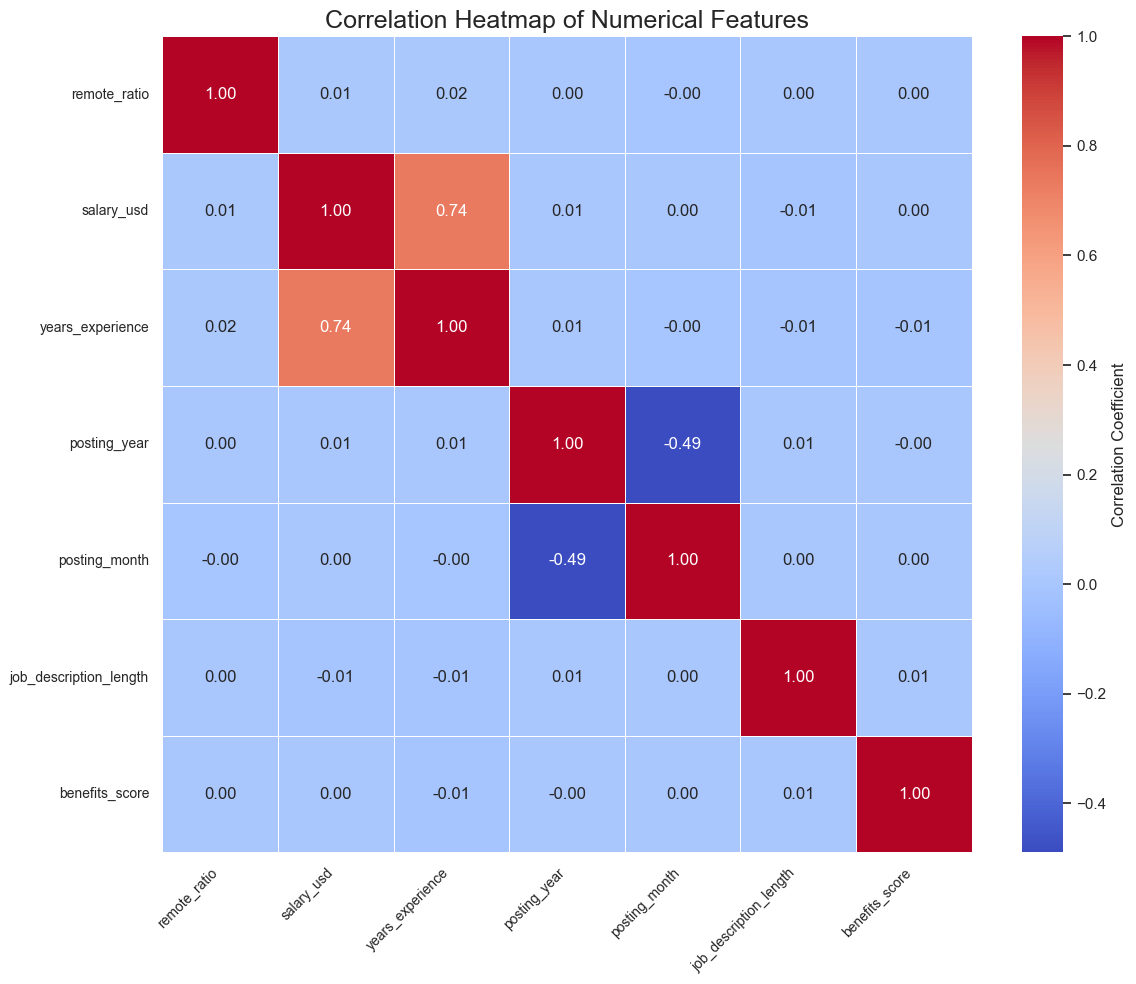


✅ Correlation heatmap generated and displayed. PNG file saved.


In [12]:
print("\n--- Generating: Correlation Heatmap (Seaborn) ---")

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Drop columns that are not relevant for correlation 

correlation_matrix = numerical_df.corr(numeric_only=True) 

if not correlation_matrix.empty and len(correlation_matrix.columns) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,      
        cmap='coolwarm', 
        fmt=".2f",       
        linewidths=.5,   
        cbar_kws={'label': 'Correlation Coefficient'} 
    )
    plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.savefig("../data/inputs/images/eda_correlation_heatmap.png")
    plt.show()
else:
    print("Warning: Not enough numerical columns or data to generate a meaningful correlation heatmap.")
    print("Numerical columns found:", numerical_df.columns.tolist())

print("\n✅ Correlation heatmap generated and displayed. PNG file saved.")

##  Salary by Experience Level (Seaborn - Box Plot)

**Objective:** Explore how salaries vary by **experience level**.  

- Displays **medians, quartiles, and outliers** for each experience category.  
- Uses custom ordering: `Entry-level → Mid-level → Senior → Executive`.  

  **Output:** Box plot showing salary distribution across experience levels.



--- Generating: Salary by Experience Level (Seaborn) ---


C:\Users\abitc\AppData\Local\Temp\ipykernel_44312\16420735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


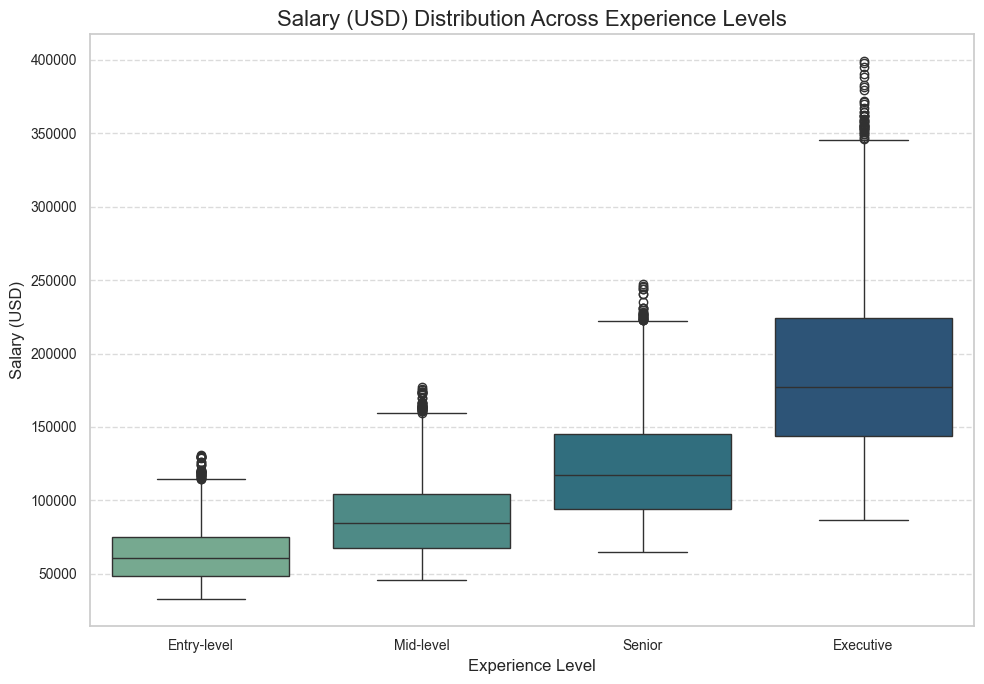

In [5]:
print("\n--- Generating: Salary by Experience Level (Seaborn) ---")
plt.figure(figsize=(10, 7))

# Ensure correct order for experience levels, as transformed in ETL

experience_order = ['Entry-level', 'Mid-level', 'Senior', 'Executive']
# Filter out any levels not in the data after transformation
sorted_levels = [level for level in experience_order if level in df['experience_level'].unique()]


if sorted_levels:
    sns.boxplot(
        x='experience_level',
        y='salary_usd',
        data=df,
        palette="crest", 
        order=sorted_levels
    )
    plt.title("Salary (USD) Distribution Across Experience Levels", fontsize=16)
    plt.xlabel("Experience Level", fontsize=12)
    plt.ylabel("Salary (USD)", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.tight_layout()
    plt.savefig("../data/inputs/images/eda_salary_by_experience.png")
    plt.show()
else:
    print("Warning: No valid experience levels found to plot. Please check 'experience_level' unique values and your ETL mapping.")
    print("Unique values in 'experience_level':", df['experience_level'].unique())



##  Job Posting Trends Over Time (Plotly Express)

**Objective:** Examine how AI-related job postings evolve over time.  

- Converts `posting_date` to proper datetime format.  
- Groups postings by **month** to create a time-series trend.  
- Uses **Plotly Express** for an **interactive line chart**.

 **Output:** Interactive HTML file with job posting trends (saved as `eda_job_posting_trends_plotly.html`).


In [6]:
import importlib

print("\n--- Generating: Job Posting Trends Over Time (Plotly Express) ---")

# Ensure 'posting_date' is datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Drop rows where posting_date could not be parsed
df_trends = df.dropna(subset=['posting_date']).copy()

# Group by year and month
df_trends['year_month'] = df_trends['posting_date'].dt.to_period('M').astype(str)
monthly_job_counts = df_trends.groupby('year_month').size().reset_index(name='job_count')

# Ensure the year_month column is sorted correctly for the plot
monthly_job_counts['year_month'] = pd.to_datetime(monthly_job_counts['year_month'])
monthly_job_counts = monthly_job_counts.sort_values('year_month').reset_index(drop=True)
monthly_job_counts['year_month'] = monthly_job_counts['year_month'].dt.strftime('%Y-%m')

if not monthly_job_counts.empty:
    fig = px.line(
        monthly_job_counts,
        x='year_month',
        y='job_count',
        title='Monthly AI Job Postings Over Time',
        labels={'year_month': 'Year-Month', 'job_count': 'Number of Job Postings'},
        hover_data={'year_month': True, 'job_count': ':.0f'},
        template='plotly_white'
    )
    fig.update_xaxes(dtick="M3", tickformat="%Y-%m", showgrid=True)
    fig.update_yaxes(showgrid=True)

    # Show plot in browser if notebook rendering is not available
    try:
        fig.show()
    except Exception as e:
        print(f"⚠️ Could not render inline: {e}")
        fig.write_html("../data/inputs/images/eda_job_posting_trends_plotly.html")
        print("✅ Open 'eda_job_posting_trends_plotly.html' in your browser.")

    # ✅ Save interactive HTML 
    fig.write_html("../data/inputs/images/eda_job_posting_trends_plotly.html")

print("\n✅ Initial EDA visualizations generated and saved. HTML file created.")



--- Generating: Job Posting Trends Over Time (Plotly Express) ---
⚠️ Could not render inline: Mime type rendering requires nbformat>=4.2.0 but it is not installed
✅ Open 'eda_job_posting_trends_plotly.html' in your browser.

✅ Initial EDA visualizations generated and saved. HTML file created.


## Salary Distribution Across Industries (Seaborn - Box Plot)

**Objective:** Compare salaries by industry.  

- Focuses on the **Top 15 industries** by number of postings.  
- Outliers removed for a cleaner visualization.

 **Output:** Horizontal box plot showing salary ranges across industries.



--- Generating: Salary Distribution by Industry (Seaborn) ---


C:\Users\abitc\AppData\Local\Temp\ipykernel_44312\2626111872.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




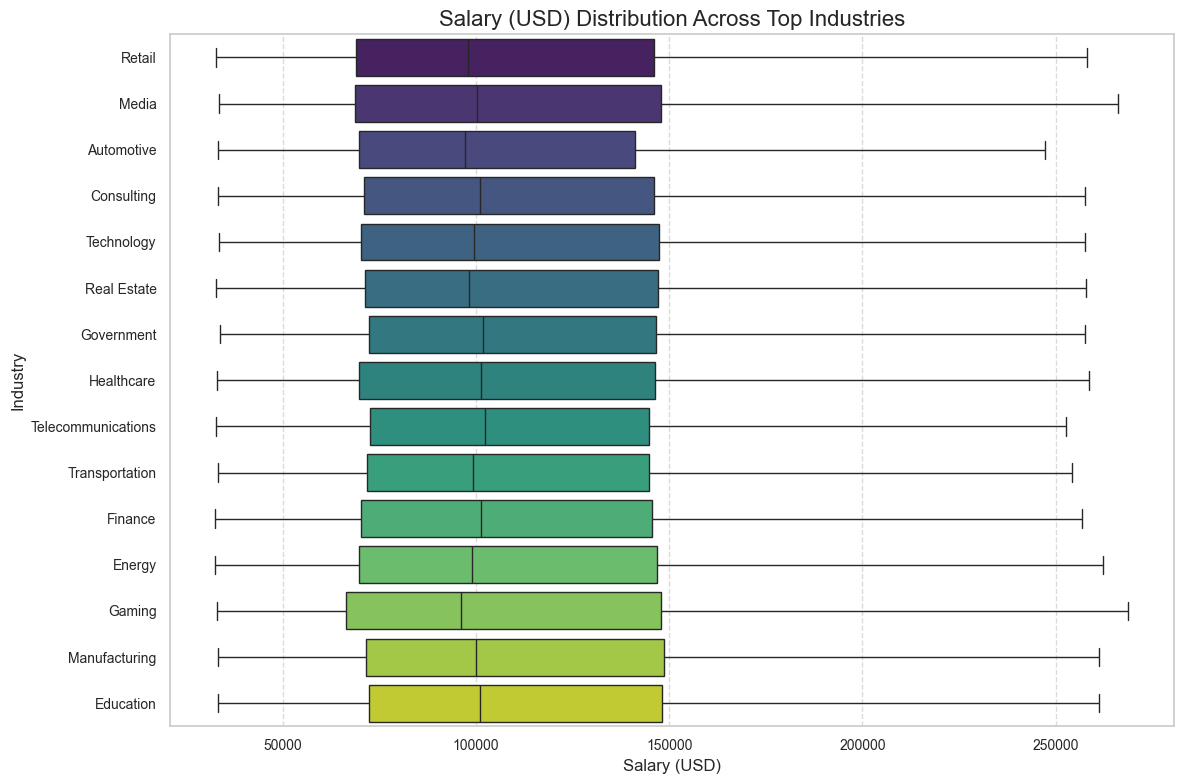

In [7]:
print("\n--- Generating: Salary Distribution by Industry (Seaborn) ---")
plt.figure(figsize=(12, 8)) 

# Get top N industries for better readability (e.g., top 15)
top_industries = df['industry'].value_counts().nlargest(15).index.tolist()

# Filter dataset to include only top industries
df_top_industries = df[df['industry'].isin(top_industries)].copy()

if not df_top_industries.empty:
    sns.boxplot(
        x='salary_usd',
        y='industry',
        data=df_top_industries,
        palette="viridis", 
        order=top_industries, 
        showfliers=False 
    )
    plt.title("Salary (USD) Distribution Across Top Industries", fontsize=16)
    plt.xlabel("Salary (USD)", fontsize=12)
    plt.ylabel("Industry", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("../data/inputs/images/eda_salary_by_industry.png")
    plt.show()
else:
    print("Warning: No data available to plot salary distribution by industry.")


##  Company Size vs. Remote Work Preference (Seaborn - Count Plot)

**Objective:** Analyze how **remote work preference** varies across **company sizes**.  

- Groups jobs by **Small (<50)**, **Medium (50–249)**, and **Large (250+) companies**.  
- Shows distribution across **On-site, Hybrid, and Fully Remote** roles.

 **Output:** Count plot with grouped bars by company size.



--- Generating: Company Size vs. Remote Work Preference (Seaborn) ---


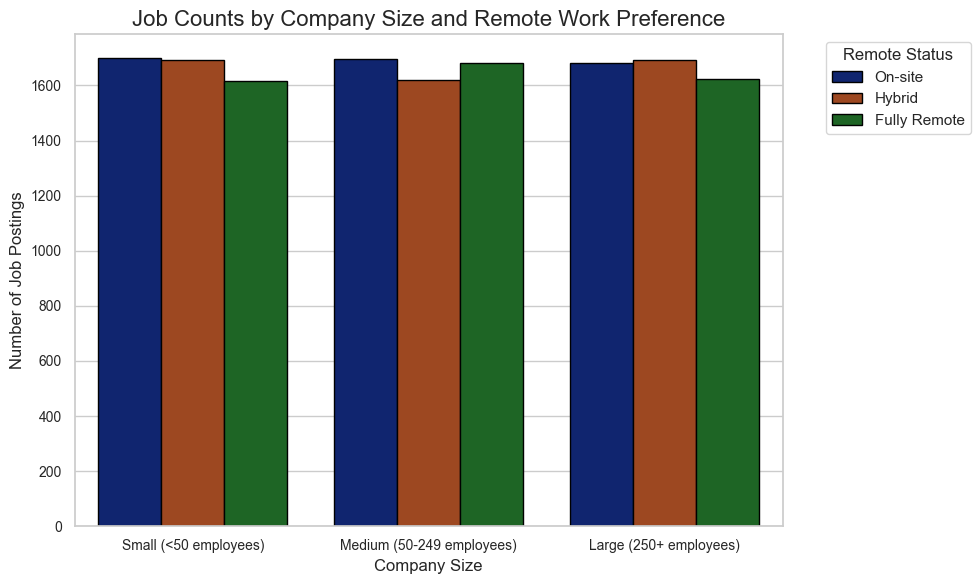

In [8]:
print("\n--- Generating: Company Size vs. Remote Work Preference (Seaborn) ---")
plt.figure(figsize=(10, 6))

# Ensure order of company sizes and remote status for consistent plotting
company_size_order = ['Small (<50 employees)', 'Medium (50-249 employees)', 'Large (250+ employees)']
remote_status_order = ["On-site", "Hybrid", "Fully Remote"]

# Filter out any company sizes or remote statuses 
filtered_df_company_remote = df[
    df['company_size'].isin(company_size_order) &
    df['remote_status'].isin(remote_status_order)
].copy()

if not filtered_df_company_remote.empty:
    sns.countplot(
        x='company_size',
        hue='remote_status',
        data=filtered_df_company_remote,
        order=company_size_order,
        hue_order=remote_status_order,
        palette='dark', 
        edgecolor='black'
    )
    plt.title("Job Counts by Company Size and Remote Work Preference", fontsize=16)
    plt.xlabel("Company Size", fontsize=12)
    plt.ylabel("Number of Job Postings", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Remote Status', bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.tight_layout()
    plt.savefig("../data/inputs/images/eda_company_size_remote_preference.png")
    plt.show()
else:
    print("Warning: No data available for company size vs. remote work preference.")



##  Top 10 Most Frequent AI Job Titles (Seaborn)

**Objective:** Identify the **most common AI-related job titles** in the dataset.

- Uses `value_counts()` to extract the **Top 10 job titles**.  
- Visualized with a **horizontal bar chart** for easy comparison.  
- Helps highlight **key roles** driving the AI job market (e.g., Data Scientist, ML Engineer).

 **Output:** `eda_top_job_titles.png` – Bar chart showing the most frequent job titles.



--- Generating: Top 10 Most Frequent Job Titles (Seaborn) ---


C:\Users\abitc\AppData\Local\Temp\ipykernel_44312\2956200282.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




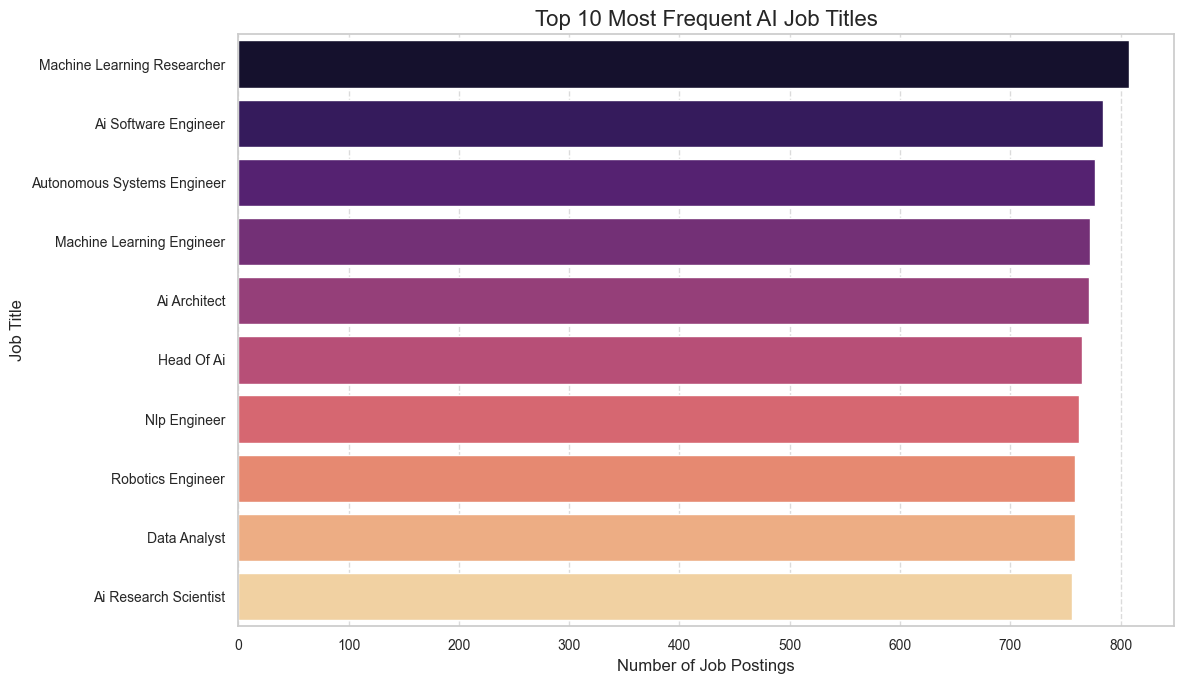

In [9]:
print("\n--- Generating: Top 10 Most Frequent Job Titles (Seaborn) ---")
plt.figure(figsize=(12, 7))

# Get the count of each job title and select the top 10
top_job_titles = df['job_title'].value_counts().nlargest(10).reset_index()
top_job_titles.columns = ['job_title', 'count']

if not top_job_titles.empty:
    sns.barplot(
        x='count',
        y='job_title',
        data=top_job_titles,
        palette='magma' 
    )
    plt.title("Top 10 Most Frequent AI Job Titles", fontsize=16)
    plt.xlabel("Number of Job Postings", fontsize=12)
    plt.ylabel("Job Title", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("../data/inputs/images/eda_top_job_titles.png")
    plt.show()
else:
    print("Warning: No data available for top job titles.")


##  Benefits Score Analysis (Seaborn)

**Objective:** Examine how companies’ **benefits scores** relate to AI salaries.

###  Step A: Distribution of Benefits Score
- Visualizes how **benefits packages** are rated across companies.  
- Uses **histogram + KDE** to show overall distribution.

###  Step B: Benefits Score vs. Salary (USD)
- Uses a **scatter plot** to analyze whether companies offering **better benefits** also pay **higher salaries**.  
- Colors points by `salary_category` for additional insight.

 **Outputs:**
- `eda_benefits_score_distribution.png` – Histogram of benefits score distribution.  
- `eda_benefits_score_vs_salary.png` – Scatter plot comparing benefits scores and salaries.



--- Generating: Benefits Score Analysis (Seaborn) ---
Number of non-null values in 'benefits_score': 15000


C:\Users\abitc\AppData\Local\Temp\ipykernel_44312\929289913.py:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



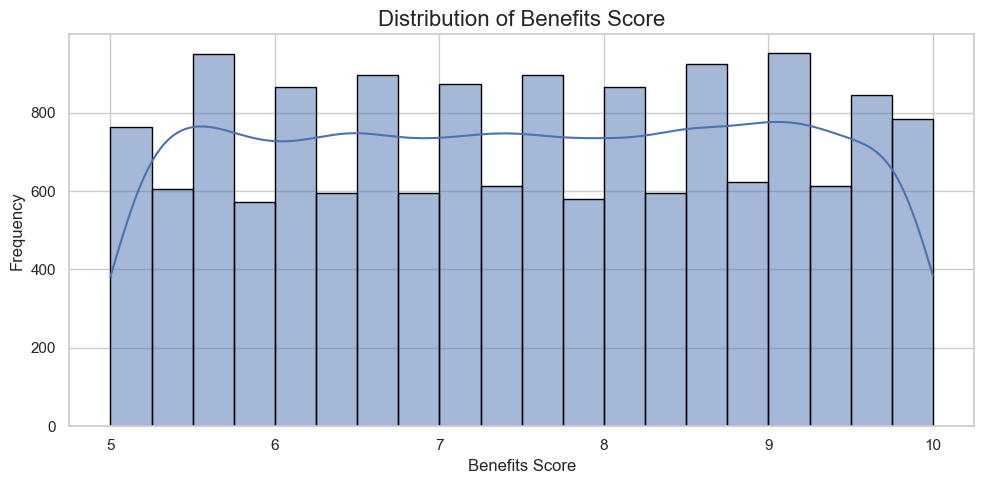

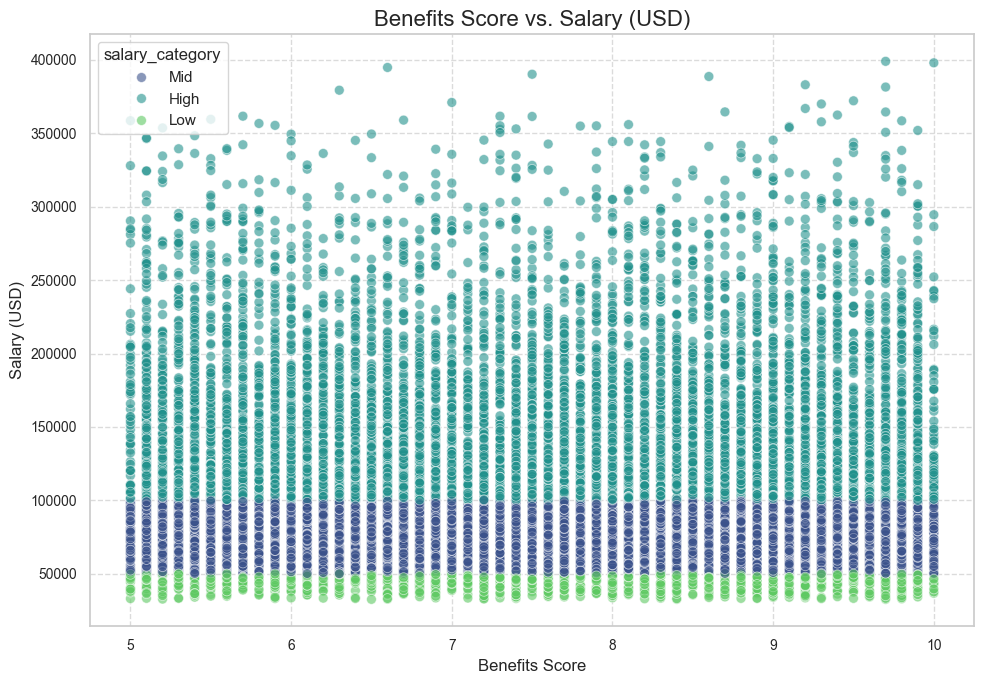


✅ All selected EDA visualizations generated and displayed. PNG and HTML (for Plotly) files saved.


In [10]:
print("\n--- Generating: Benefits Score Analysis (Seaborn) ---")

# Check if 'benefits_score' 
if 'benefits_score' in df.columns:
    print(f"Number of non-null values in 'benefits_score': {df['benefits_score'].count()}")
    if df['benefits_score'].count() == 0:
        print("Warning: 'benefits_score' column exists but contains no non-null values. Skipping plots.")
    else:
        # Plot 1: Distribution of Benefits Score
        plt.figure(figsize=(10, 5))
        sns.histplot(df['benefits_score'].dropna(), kde=True, bins=20, palette='Blues_r', edgecolor='black')
        plt.title("Distribution of Benefits Score", fontsize=16)
        plt.xlabel("Benefits Score", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.tight_layout()
        plt.savefig("../data/inputs/images/eda_benefits_score_distribution.png")
        plt.show()

        # Plot 2: Benefits Score vs. Salary (USD)
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x='benefits_score',
            y='salary_usd',
            data=df.dropna(subset=['benefits_score', 'salary_usd']), 
            alpha=0.6, 
            hue='salary_category', 
            palette='viridis',
            s=50 
        )
        plt.title("Benefits Score vs. Salary (USD)", fontsize=16)
        plt.xlabel("Benefits Score", fontsize=12)
        plt.ylabel("Salary (USD)", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig("../data/inputs/images/eda_benefits_score_vs_salary.png")
        plt.show()

print("\n✅ All selected EDA visualizations generated and displayed. PNG and HTML (for Plotly) files saved.")

##  Summary

This EDA notebook provides:
- **Initial insights** into salary trends, industries, and company dynamics.  
- **Interactive and static charts** for different audiences (reports, dashboards, presentations).  

The findings here will guide **further statistical analysis** and **machine learning modeling** in future phases.
